# TRANSACTIONS TO PARTIAL RESULTS:

This script intends to make an exploratory data analysis on the partially-treated data to jump to our first conclussions.

# 1. IMPORTING PACKAGES AND THE INFORMATION:


In [2]:
# Importing packages:

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [3]:
#Defining the search path of the file, the name and the separator:

file_path = "../../data/01_raw/"
file_name = "b2-transactions.csv"

sep=";"


# Provisional file:

total_sales_results_per_id="total_sales_results_per_id.csv"
total_sales_results_per_id_and_store="total_sales_results_per_id_and_store.csv"

In [4]:
# Now, we import the file and storing it in df: 
# (at first, we only import several thousand rows)

df=pd.read_csv(file_path+file_name, nrows=1000000, sep=sep)
df.head()

,Unnamed: 0,product_id,description,order_date,section,store,units_ordered
0,0,211.0,EMPANADILLAS SALMON,12/6/2009 0:00:00,0,BmUP,"0,00"
1,1,1231.0,MALLORCA CELOFAN VAINILLA,13/6/2009 0:00:00,0,BmUP,"0,00"
2,2,1233.0,ROCAS FILET VAINILLA,13/6/2009 0:00:00,0,BmUP,"1,00"
3,3,1234.0,LICOR GUINDAS,13/6/2009 0:00:00,0,BmUP,"1,00"
4,4,1235.0,LICOR UVAS,13/6/2009 0:00:00,0,BmUP,"1,00"


In [5]:
df.shape

(1000000, 7)

In [6]:
df.columns

Index(['Unnamed: 0', 'product_id', 'description', 'order_date', 'section',
       'store', 'units_ordered'],
      dtype='object')

# 2. CHECKING FOR NULL VALUES:

In [7]:
# Checking if is there any null values:

df.isnull().values.any()

True

In [8]:
# Also checking the na values:

df.isna().values.any()

True

In [9]:
# We can construct a vector for selecting those rows that have any missing data:

# First we create a boleean array that tells us wether the row has missing data:

missing_data_check=False
for column in df.columns:
    missing_data_check = missing_data_check |df[column].isnull()
    
# We can now slice the column to get only those columns that have missing data:

array_of_missing_values=missing_data_check[missing_data_check==True]

In [10]:
# We now check the lenght of this resulting vector:

len(array_of_missing_values)

1056

In [11]:
# After checking that the % of the missing data rows is despicable (for 1000000 rows we get 1056, or 0.1%), we decide to drop them:

df.dropna(how='any', inplace=True)

In [12]:
# We drop the 'Unnamed: 0' column, due to it seems to be an old index made column, and its information is redundant:

df=df.drop('Unnamed: 0', axis=1)
df.head(10)

,product_id,description,order_date,section,store,units_ordered
0,211.0,EMPANADILLAS SALMON,12/6/2009 0:00:00,0,BmUP,"0,00"
1,1231.0,MALLORCA CELOFAN VAINILLA,13/6/2009 0:00:00,0,BmUP,"0,00"
2,1233.0,ROCAS FILET VAINILLA,13/6/2009 0:00:00,0,BmUP,"1,00"
3,1234.0,LICOR GUINDAS,13/6/2009 0:00:00,0,BmUP,"1,00"
4,1235.0,LICOR UVAS,13/6/2009 0:00:00,0,BmUP,"1,00"
5,1237.0,TRUFAS WHISKY,13/6/2009 0:00:00,0,BmUP,"1,00"
6,1238.0,TRUFAS HELADAS CAFE,13/6/2009 0:00:00,0,BmUP,"1,00"
7,1239.0,TRUFAS HELADAS PRALINE,13/6/2009 0:00:00,0,BmUP,"0,00"
8,1240.0,TRUFAS HELADAS COCO,13/6/2009 0:00:00,0,BmUP,"1,00"
9,1242.0,TRUFAS HELADAS RON,13/6/2009 0:00:00,0,BmUP,"0,00"


# 3. FIRST EVALUATIONS OF THE DATA:

## 3.1. Checking the number of different ids and plotting their count:

In [13]:
# Taking a look of how many different ids exist and their totals (in our 10.000 rows, of course):

prod_and_num_trans=df.groupby('product_id').count()['description'].sort_values(ascending=False)
prod_and_num_trans

product_id
9999.0    24853
202.0      7422
451.0      5360
459.0      5286
450.0      4953
887.0      4606
410.0      4589
453.0      4546
209.0      4331
296.0      4294
463.0      4127
291.0      4113
411.0      4046
203.0      3846
201.0      3813
820.0      3773
452.0      3761
230.0      3742
101.0      3738
464.0      3730
413.0      3708
846.0      3708
446.0      3698
295.0      3687
865.0      3672
462.0      3653
182.0      3602
428.0      3587
402.0      3578
227.0      3575
          ...  
200.0         1
1261.0        1
1256.0        1
1255.0        1
4477.0        1
195.0         1
699.0         1
705.0         1
1038.0        1
1286.0        1
472.0         1
9018.0        1
8702.0        1
2956.0        1
491.0         1
620.0         1
253.0         1
248.0         1
247.0         1
476.0         1
8736.0        1
9012.0        1
8737.0        1
8753.0        1
8819.0        1
1303.0        1
9008.0        1
474.0         1
9009.0        1
617.0         1
Name: descrip

In [14]:
# We want to take a look for checking how many different values exist in our df:

len(prod_and_num_trans)

# The result is that in the first 100.000 rows we have 1283 unique ids.

1885

In [15]:
best_sellers_list=prod_and_num_trans.iloc[0:50]
best_sellers_list

product_id
9999.0    24853
202.0      7422
451.0      5360
459.0      5286
450.0      4953
887.0      4606
410.0      4589
453.0      4546
209.0      4331
296.0      4294
463.0      4127
291.0      4113
411.0      4046
203.0      3846
201.0      3813
820.0      3773
452.0      3761
230.0      3742
101.0      3738
464.0      3730
413.0      3708
846.0      3708
446.0      3698
295.0      3687
865.0      3672
462.0      3653
182.0      3602
428.0      3587
402.0      3578
227.0      3575
231.0      3545
816.0      3534
521.0      3484
140.0      3445
103.0      3438
271.0      3385
229.0      3345
204.0      3336
228.0      3312
177.0      3276
272.0      3234
914.0      3165
242.0      3162
461.0      3129
293.0      3096
102.0      3060
142.0      3060
298.0      3055
457.0      3050
720.0      3047
Name: description, dtype: int64

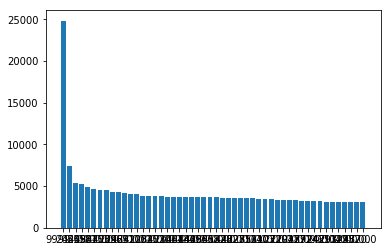

In [16]:
names=[str(x) for x in best_sellers_list.index]
plt.bar(names, height=best_sellers_list.values);

## 3.2. Adding all the orders for each id and getting first totals and sells share:

## 3.2.1. First problem:

We face our first problem here. The information on units oredered is not of type integer, as we would like to have it, but
it is a string. We have to convert it appropriately before going on:

In [17]:
type(df['units_ordered'][5])

str

In [18]:
# Quick check on the different positions the comma might be at:

comma_positions=df['units_ordered'].str.find(",")
comma_positions.unique()

array([1, 2, 3], dtype=int64)

In [19]:
# The 'units_ordered' column is a string, that cannot be easily converted to integer because
# their numbers are in continental format ("," instead of "." for decimals).

# So, we decide to separate the string by the comma, take the first partition and store it in the df as an integer (long, in
# provision of numbers in the order of magnitude of the limit of the standard 'int' ~ 31500):

df['units_ordered_numeric']=df['units_ordered'].str.split(",").str[0].astype(dtype='long')

df.columns

Index(['product_id', 'description', 'order_date', 'section', 'store',
       'units_ordered', 'units_ordered_numeric'],
      dtype='object')

## 3.2.2. Getting the totals:

In [20]:
# We take a quick glance to the results to check that everything is fine:

df.head(20)

,product_id,description,order_date,section,store,units_ordered,units_ordered_numeric
0,211.0,EMPANADILLAS SALMON,12/6/2009 0:00:00,0,BmUP,"0,00",0
1,1231.0,MALLORCA CELOFAN VAINILLA,13/6/2009 0:00:00,0,BmUP,"0,00",0
2,1233.0,ROCAS FILET VAINILLA,13/6/2009 0:00:00,0,BmUP,"1,00",1
3,1234.0,LICOR GUINDAS,13/6/2009 0:00:00,0,BmUP,"1,00",1
4,1235.0,LICOR UVAS,13/6/2009 0:00:00,0,BmUP,"1,00",1
5,1237.0,TRUFAS WHISKY,13/6/2009 0:00:00,0,BmUP,"1,00",1
6,1238.0,TRUFAS HELADAS CAFE,13/6/2009 0:00:00,0,BmUP,"1,00",1
7,1239.0,TRUFAS HELADAS PRALINE,13/6/2009 0:00:00,0,BmUP,"0,00",0
8,1240.0,TRUFAS HELADAS COCO,13/6/2009 0:00:00,0,BmUP,"1,00",1
9,1242.0,TRUFAS HELADAS RON,13/6/2009 0:00:00,0,BmUP,"0,00",0


In [21]:
# Proceeding to check the products:

# We want to group by id and description no. What we want to check now is:

    # Wheter there are ids assigned to several product or there are not
    # If an id is assigned to several product, we want to check if there is a logical relationship among those products
    # The quantities of the products bought along the lines we have selected

totals_by_id_description=df.groupby(['product_id', 'description'], as_index=False).sum().sort_values('units_ordered_numeric', ascending=False)
totals_by_id_description.head()

,product_id,description,section,units_ordered_numeric
2745,245.0,Sandwiches Surtidos,0,78850
1527,150.0,TORRIJAS GRANDES,0,62339
3105,271.0,MINI QUICHES JAMON,0,59407
3111,272.0,MINI QUICHES SALMON,0,54600
1142,112.0,TORTELES,0,34976


In [22]:
total_sales=totals_by_id_description.sum()[3]
total_sales

1554180

## 3.2.3. Getting total shares:

In [23]:
totals_by_id_description['sells_share']=totals_by_id_description['units_ordered_numeric']/total_sales

totals_by_id_description.head()

,product_id,description,section,units_ordered_numeric,sells_share
2745,245.0,Sandwiches Surtidos,0,78850,0.050734
1527,150.0,TORRIJAS GRANDES,0,62339,0.040111
3105,271.0,MINI QUICHES JAMON,0,59407,0.038224
3111,272.0,MINI QUICHES SALMON,0,54600,0.035131
1142,112.0,TORTELES,0,34976,0.022504


## 3.2.3. Second problem:

We have a slight problem with the data, which is the relation id-description is not unique, as e can see below:


In [24]:
totals_by_id_description[totals_by_id_description['product_id']==245].head(20)

,product_id,description,section,units_ordered_numeric,sells_share
2745,245.0,Sandwiches Surtidos,0,78850,0.050734
2905,245.0,Sandwiches Surtidos QUE NO LLEVE NADA CERDO,0,100,0.000064
2992,245.0,Sandwiches VEGETALES,0,95,0.000061
2983,245.0,"Sandwiches SurtidosSANDHICHS MIXTOS,VEGETALES,...",0,75,0.000048
2757,245.0,Sandwiches Surtidos 8 de cada clase,0,64,0.000041
2783,245.0,"Sandwiches Surtidos , NADA DE CERDO",0,50,0.000032
2912,245.0,Sandwiches Surtidos SIN CERDO,0,40,0.000026
2739,245.0,Sandwiches SOLO DE CANGREJO POLLO ATUN SALMON ...,0,40,0.000026
2887,245.0,"Sandwiches Surtidos DE ATUN 10,POLLO 10,VEGETA...",0,40,0.000026
2937,245.0,"Sandwiches Surtidos variados, NO CERDO",0,40,0.000026


We then, proceed to count and order:

In [25]:
# An accesory table is created to store the counting for each id, then this table is 
# adjoined to our main df: totals_by_id_description

accesory_table_1=totals_by_id_description.groupby('product_id').count()
accesory_table_1.columns=['count', 'count2', 'count3', 'count4']

totals_by_id_description.merge(accesory_table_1['count'], on='product_id').sort_values('count', ascending=False).head(20)

,product_id,description,section,units_ordered_numeric,sells_share,count
16789,9999.0,"TARTA SELVA NEGRA DEL 2, CARTEL. FELICIDADES P...",0,0,0.0,17684
13289,9999.0,EncargoTARTA MOUSSE TRES CHOCOLATES DEL 4,0,0,0.0,17684
13296,9999.0,Encargo 30 TROZOS DE SALMON A LA NARANJA,0,0,0.0,17684
13295,9999.0,EncargoTARTA MOUSSE DE TRES CHOCOLATES 4,0,0,0.0,17684
13294,9999.0,EncargoTARTA MOUSSE TRES CHOCOLATES 16 RACIONES,0,0,0.0,17684
13293,9999.0,EncargoTARTA MOUSSE TRES CHOCO 5,0,0,0.0,17684
13292,9999.0,EncargoTARTA MOUSSE TRES CHOCOLAES 5 FELICIDAD...,0,0,0.0,17684
13291,9999.0,EncargoTARTA MOUSSE TRES CHOCOLATES 2 ESCRITO ...,0,0,0.0,17684
13290,9999.0,EncargoTARTA MOUSSE TRES CHOCOLATES DE 16 RACI...,0,0,0.0,17684
13288,9999.0,EncargoTARTA MUS 3 CHOCOLATES 5 ESCRITO SOBRE ...,0,0,0.0,17684


We can see that there is a product id just forf orders (9999), that has cannot be specified as a unique product.

On the other hand, we see that this product id has certain particularities: for instance, there are lots of orders with 0 units
ordered, which seems extrange.

In [26]:
filter1=(totals_by_id_description['product_id']==9999) &  (totals_by_id_description['units_ordered_numeric']==0)
totals_by_id_description[filter1].head(10)

,product_id,description,section,units_ordered_numeric,sells_share
19240,9999.0,Encargo CARTEL DE CHOCOLATE ´´ FELICIDADES MAMÁ´´,0,0,0.0
23171,9999.0,EncargoROSCON 10R NATA,0,0,0.0
23172,9999.0,EncargoROSCON 20 RACIONES,0,0,0.0
23243,9999.0,EncargoSALSA DE MOSTAZA Y MIEL,0,0,0.0
19242,9999.0,Encargo CARTEL DE CHOCOLATE ´´ FELICIDADES MI ...,0,0,0.0
19241,9999.0,Encargo CARTEL DE CHOCOLATE ´´ FELICIDADES MAR...,0,0,0.0
23170,9999.0,EncargoROSCON 10R,0,0,0.0
23165,9999.0,EncargoROLLITOS DE LENGUADO CON LANGOSTINOS AL...,0,0,0.0
23164,9999.0,EncargoROLLITOS DE LENGUADO CON LANGOSTINOS 8 RAC,0,0,0.0
19243,9999.0,Encargo CARTEL DE CHOCOLATE ´´ FELICIDADES TRU...,0,0,0.0


'

So, lets take a look to the relationship between the id and its description:


'

In [27]:
dif_id_description_matches=totals_by_id_description[['product_id','description']].sort_values('product_id', ascending=True)
dif_id_description_matches.head()

,product_id,description
0,1.0,ARBOL DE NAVIDAD ROCA FILET PEQ
2,2.0,PASTA SABLE MANTEQUILLA BOLSA 150 GRS de san v...
1,2.0,PASTA SABLE MANTEQUILLA BOLSA 150 GRS
19,45.0,POSTRE SAN HONORET
18,45.0,POSTRE SACHER


In [28]:
prods_per_id=dif_id_description_matches.groupby('product_id', as_index=False).count().sort_values('description', ascending=False)

In [29]:
prods_per_id.head()

,product_id,description
1823,9999.0,17684
320,450.0,1152
287,414.0,1101
139,245.0,479
283,410.0,456


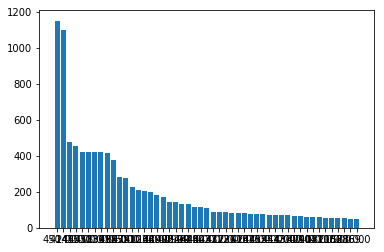

In [30]:
ppi50=prods_per_id[1:50]

names2=[str(x) for x in ppi50['product_id']]

plt.bar(names2, ppi50['description']);

In [31]:
#Keeping these lines just in case:

# searching_for_unique=totals_by_id_description[['product_id','description']]
# searching_for_unique['joined_cols']=searching_for_unique['product_id'].apply(str)+"/"+searching_for_unique['description']

'


These results make us think again the groupby used.

Is it, perhaps, more useful to group the products just by id?



'

In [32]:
accesory_table2=df.groupby(['product_id'], as_index=False).first()[['product_id','description']]
df.head()

,product_id,description,order_date,section,store,units_ordered,units_ordered_numeric
0,211.0,EMPANADILLAS SALMON,12/6/2009 0:00:00,0,BmUP,"0,00",0
1,1231.0,MALLORCA CELOFAN VAINILLA,13/6/2009 0:00:00,0,BmUP,"0,00",0
2,1233.0,ROCAS FILET VAINILLA,13/6/2009 0:00:00,0,BmUP,"1,00",1
3,1234.0,LICOR GUINDAS,13/6/2009 0:00:00,0,BmUP,"1,00",1
4,1235.0,LICOR UVAS,13/6/2009 0:00:00,0,BmUP,"1,00",1


In [33]:
totals_by_id=df.groupby(['product_id'], as_index=False).agg(sum('units_oredered_numeric').alias('total'), first('description'), count('description').alias('num_rows')).sort_values('total', ascending=False)

TypeError: unsupported operand type(s) for +: 'int' and 'str'

In [34]:
dict2

NameError: name 'dict2' is not defined

In [35]:
dict1={'units_ordered_numeric':'sum','description':'first','units_ordered':'count'}

totals_by_id=df.groupby(['product_id'], as_index=False).agg(dict1).sort_values('units_ordered_numeric', ascending=False)

list1=['product_id', 'total_orders', 'description', 'number_of_different_names']

totals_by_id.columns=list1

totals_by_id.head(20)

,product_id,total_orders,description,number_of_different_names
139,245.0,80052,Sandwiches Surtidos,2138
56,150.0,62339,TORRIJAS GRANDES,692
154,271.0,59527,MINI QUICHES JAMON,3385
155,272.0,54710,MINI QUICHES SALMON,3234
20,112.0,35231,TORTELES,2805
99,203.0,31838,QUICHES DE QUESO,3846
63,160.0,29137,TORRIJAS PEQUEÑAS,506
148,260.0,20792,QUICHES DE SALMON PÑOS.,2891
48,140.0,20359,PALMERAS,3445
23,115.0,18450,BAGUETT MALLORCA,2419


In [36]:
dict1={'units_ordered_numeric':'sum','description':'first','units_ordered':'count'}

totals_by_id_and_store=df.groupby(['product_id', 'store'], as_index=False).agg(dict1).sort_values(['store','units_ordered_numeric'], ascending=False)

list2=['product_id', 'store', 'total_orders', 'description', 'number_of_different_names']

totals_by_id_and_store.columns=list2

totals_by_id_and_store.head(20)

,product_id,store,total_orders,description,number_of_different_names
139,245.0,BmUP,80052,Sandwiches Surtidos,2138
56,150.0,BmUP,62339,TORRIJAS GRANDES,692
154,271.0,BmUP,59527,MINI QUICHES JAMON,3385
155,272.0,BmUP,54710,MINI QUICHES SALMON,3234
20,112.0,BmUP,35231,TORTELES,2805
99,203.0,BmUP,31838,QUICHES DE QUESO,3846
63,160.0,BmUP,29137,TORRIJAS PEQUEÑAS,506
148,260.0,BmUP,20792,QUICHES DE SALMON PÑOS.,2891
48,140.0,BmUP,20359,PALMERAS,3445
23,115.0,BmUP,18450,BAGUETT MALLORCA,2419


# 4. ENDING:

After all this process, we have learned a few things:

-We have data related to orders of several products and stores. The products are marked by an id and a description.

-Our data has null values, but very few, and we have then decided to discard them.

-Our data has not a solid relationship between id and description of the products. In general, an id is assigned to many "similar" products. In a few cases, it has been noticed that an id is given to two disimilar products (we are assuming that this is due to human mistake).

-Also, there is an id (9999) that, as it is used for direct orders from customers, is assigned to a lot of different products. We could try to reassign this products by its description to their other suitable id, or disregard the whole id. As we were asked not to take into account the direct online orders from customers, the solution should be to not use this id.

-Appart from the stated, id seems a better indicator than description, for grouping the aforementioned products.

-Some additional checks should be done to adress the suitability of the id as indicator of the product. Specifically, it would be interesting to check the behaviour of id against a manual filter based on some keywords.



Taking into consideration that we have operated this script over one million lines, the results in terms of comparison of the sales of the different products should be relatively reliable.

In this spirit is why we export the two last dataframes.

In [37]:
# We can now store these results in a csv, for sending, if it is convenient 
# (taking into account that these are not results obtained on the total of the information given):

totals_by_id.to_csv(file_path+total_sales_results_per_id, sep=sep)
totals_by_id_and_store.to_csv(file_path+total_sales_results_per_id_and_store, sep=sep)